# Tomato Disease Classification

#### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.9.2


#### Perform datasplit on dataset
Download dataset from https://www.kaggle.com/datasets/arjuntejaswi/plant-village/data and extract here

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 --output ./datasplit ./PlantVillage/

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset with ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    'datasplit/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
)

Found 12804 images belonging to 10 classes.


In [4]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.593534   0.53471047 0.52294576]
  [0.6039216  0.54509807 0.53333336]
  [0.59777963 0.5389561  0.5271914 ]
  ...
  [0.748015   0.68919146 0.67742676]
  [0.7556561  0.6967761  0.6850302 ]
  [0.7274847  0.6672841  0.65597844]]

 [[0.59221345 0.5333899  0.5216252 ]
  [0.60390383 0.5450803  0.5333156 ]
  [0.6039216  0.54509807 0.53333336]
  ...
  [0.53443325 0.46518335 0.45689413]
  [0.5062618  0.4356914  0.42784232]
  [0.5119619  0.44137365 0.4335305 ]]

 [[0.59468484 0.5358613  0.5240966 ]
  [0.6025832  0.5437597  0.531995  ]
  [0.6039216  0.54509807 0.53333336]
  ...
  [0.5541919  0.48360366 0.47576052]
  [0.5603544  0.48976615 0.481923  ]
  [0.56569797 0.4951097  0.48726657]]

 ...

 [[0.48668402 0.41609576 0.40825263]
  [0.48642808 0.41583985 0.4079967 ]
  [0.488629   0.41804075 0.41019762]
  ...
  [0.54698163 0.49207968 0.4881581 ]
  [0.55721545 0.5023135  0.49749973]
  [0.52983314 0.47493115 0.46316645]]

 [[0.50371116 0.4331229  0.42527977]
  [0.5058883  0.43531787 0.42746878]


In [7]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
    'datasplit/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 1597 images belonging to 10 classes.


In [8]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
    'datasplit/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 1610 images belonging to 10 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6917023  0.63680035 0.6328788 ]
  [0.7403225  0.68542045 0.6814989 ]
  [0.73122096 0.676319   0.67239743]
  ...
  [0.7706709  0.71184736 0.6843964 ]
  [0.73305154 0.674228   0.64677703]
  [0.7184002  0.65957665 0.6321257 ]]

 [[0.7162291  0.6613271  0.65740556]
  [0.7449725  0.69007057 0.686149  ]
  [0.7193429  0.6644409  0.6605193 ]
  ...
  [0.7476592  0.6888357  0.6613847 ]
  [0.7076574  0.6488339  0.6213829 ]
  [0.7326814  0.67385787 0.6464069 ]]

 [[0.6787104  0.62380844 0.6198869 ]
  [0.7178243  0.6629223  0.65900075]
  [0.7278865  0.67298454 0.669063  ]
  ...
  [0.81113696 0.75231344 0.72486246]
  [0.7069211  0.6480976  0.6206466 ]
  [0.7017587  0.64293516 0.6154842 ]]

 ...

 [[0.52146757 0.44303623 0.41558522]
  [0.5540304  0.47559908 0.4481481 ]
  [0.5676182  0.48918685 0.46173587]
  ...
  [0.5436959  0.43389204 0.3907548 ]
  [0.54015815 0.43035424 0.387217  ]
  [0.5288785  0.4190746  0.37593734]]

 [[0.5146807  0.4362493  0.4087983 ]
  [0.55777156 0.47934017 0.4518892 ]


### Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
# 12804 train images divide by batch size (32) equal to steps per epoch

12804 / 32

400.125

In [14]:
# 1597 validation images divide by batch size (32) equal to validation steps per epoch

1597 / 32

49.90625

In [15]:
acc = []
val_acc = []
loss = []
val_loss = []

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}:")
    
    history = model.fit(
        train_generator,
        steps_per_epoch=400,
        batch_size=BATCH_SIZE,
        validation_data=validation_generator,
        validation_steps=49,
        verbose=1,
        epochs=1,  # Train for 1 epoch at a time
    )

    # Accumulate the history across epochs
    acc.append(history.history['accuracy'])
    val_acc.append(history.history['val_accuracy'])
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])


Epoch 1/50:
400/400 [==============================] - 1494s 4s/step - loss: 1.5617 - accuracy: 0.4468 - val_loss: 1.0229 - val_accuracy: 0.6460
Epoch 2/50:
400/400 [==============================] - 1442s 4s/step - loss: 0.7526 - accuracy: 0.7404 - val_loss: 0.6371 - val_accuracy: 0.7902
Epoch 3/50:
400/400 [==============================] - 1412s 4s/step - loss: 0.5050 - accuracy: 0.8255 - val_loss: 0.5138 - val_accuracy: 0.8253
Epoch 4/50:
400/400 [==============================] - 1371s 3s/step - loss: 0.3946 - accuracy: 0.8620 - val_loss: 0.2941 - val_accuracy: 0.9126
Epoch 5/50:
400/400 [==============================] - 1343s 3s/step - loss: 0.3309 - accuracy: 0.8842 - val_loss: 0.3176 - val_accuracy: 0.8916
Epoch 6/50:
400/400 [==============================] - 1353s 3s/step - loss: 0.2748 - accuracy: 0.9024 - val_loss: 0.3154 - val_accuracy: 0.9082
Epoch 7/50:
400/400 [==============================] - 1351s 3s/step - loss: 0.2481 - accuracy: 0.9150 - val_loss: 0.3279 - val_ac

In [16]:
scores = model.evaluate(test_generator)

51/51 [==============================] - 81s 2s/step - loss: 0.1470 - accuracy: 0.9671


In [17]:
# Scores is just a list containing loss and accuracy value

scores

[0.14696912467479706, 0.9670807719230652]

### Plotting the Accuracy and Loss Curves


In [18]:
history

In [19]:
history.params


{'verbose': 1, 'epochs': 1, 'steps': 400}

In [20]:
history.history.keys()

# loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

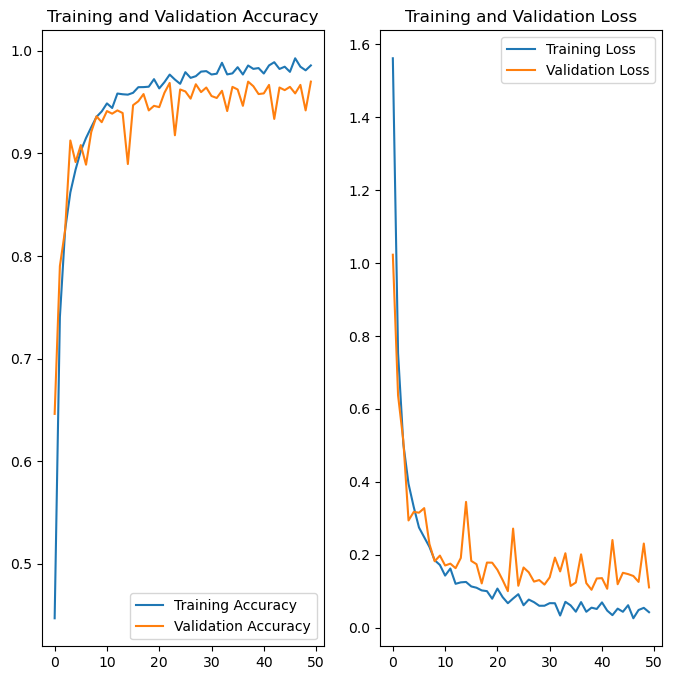

In [21]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict


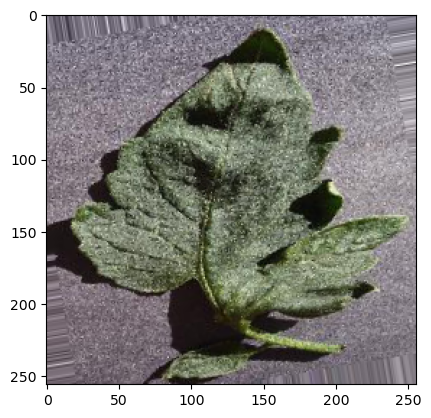

actual label: Tomato_healthy
1/1 [==============================] - 1s 1s/step
predicted labels: ['Tomato_healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold']


In [22]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    plt.show()  # Show the image
    print("actual label:", class_names[first_label])

    batch_predictions = model.predict(image_batch)
    predicted_labels = [np.argmax(pred) for pred in batch_predictions]
    print("predicted labels:", [class_names[pred_label] for pred_label in predicted_labels])

    break

1/1 [==============================] - 0s 337ms/step


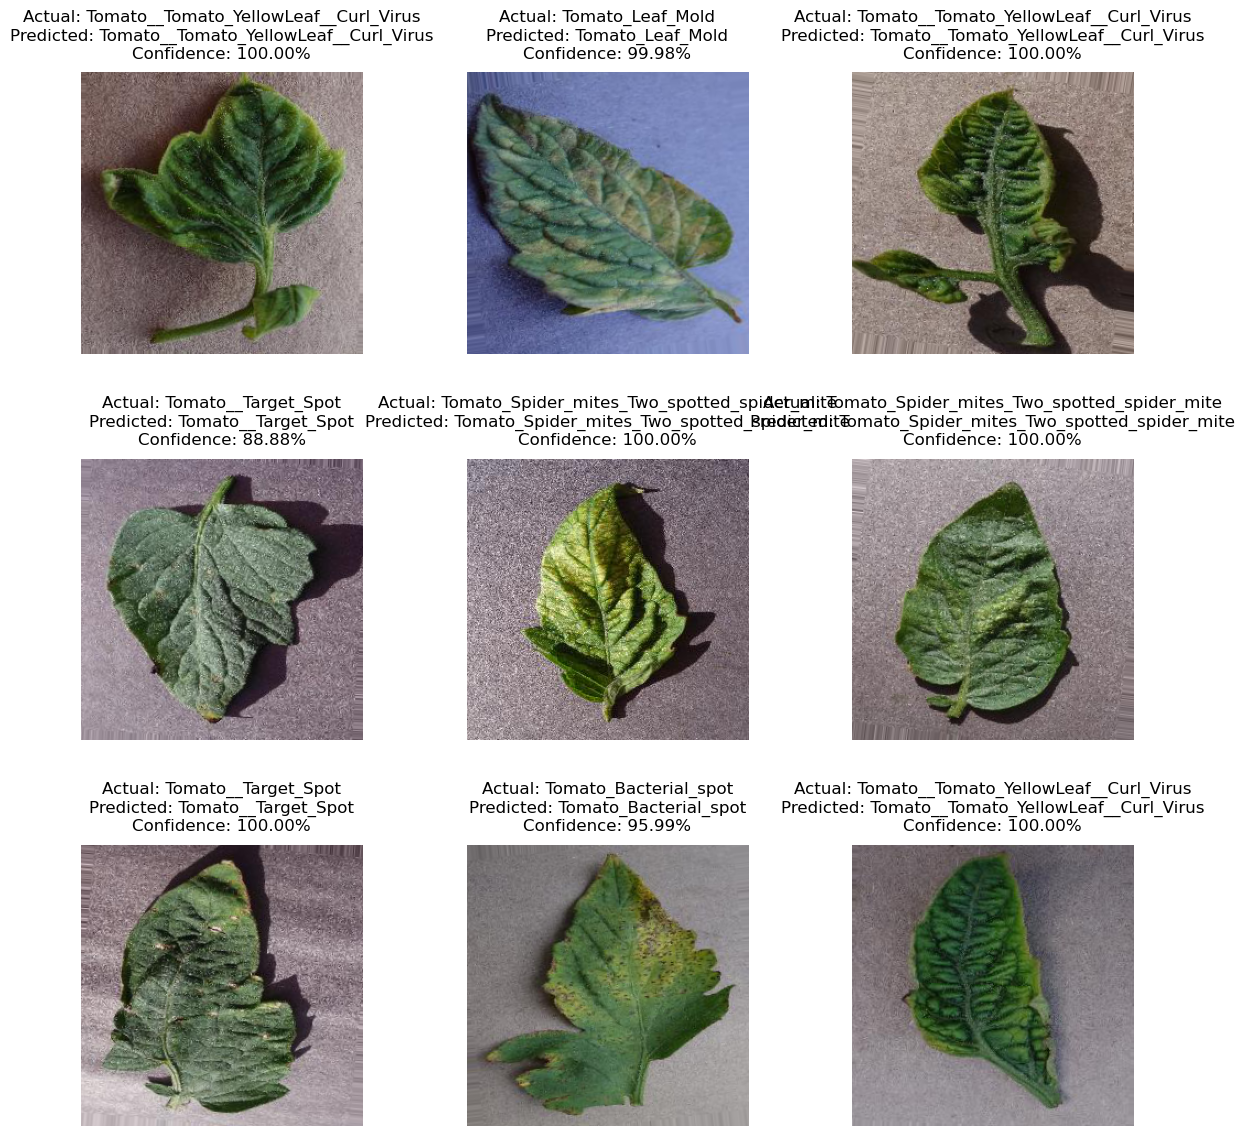

In [23]:
import random

# Assuming test_generator is your data generator
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Get the total number of batches
num_batches = len(test_generator)

# Select a random batch index
random_batch_index = random.randint(0, num_batches)

# Load the random batch
image_batch, label_batch = test_generator[random_batch_index]

# Predictions for the random batch
batch_predictions = model.predict(image_batch)

# Randomly select 9 images from the batch
random_indices = random.sample(range(len(image_batch)), 9)

for i, index in enumerate(random_indices):
    row = i // 3
    col = i % 3

    image = image_batch[index]
    label = int(label_batch[index])
    prediction = np.argmax(batch_predictions[index])
    # Confidence percentage
    confidence = np.max(batch_predictions[index]) * 100

    axs[row, col].imshow(image)
    axs[row, col].set_title(f"Actual: {class_names[label]}\nPredicted: {class_names[prediction]}\nConfidence: {confidence:.2f}%", pad=10)
    axs[row, col].axis('off')

plt.tight_layout(pad=3.0)
plt.show()


### Saving the Model

In [32]:
import os
from datetime import datetime

# Keras & H5 format
# Create directories if they don't exist
keras_directory = "model/keras"
h5_directory = "model/h5"

os.makedirs(keras_directory, exist_ok=True)
os.makedirs(h5_directory, exist_ok=True)

now = datetime.now()
date_time_str = now.strftime("%Y-%m-%d_%H-%M-%S")

keras_file_name = os.path.join(keras_directory, f"tomato_{date_time_str}.keras")
h5_file_name = os.path.join(h5_directory, f"tomato_{date_time_str}.h5")

model.save(keras_file_name)
print("Model (keras) saved with file name:", keras_file_name)

model.save(h5_file_name)
print("Model (h5) saved with file name:", h5_file_name)

# Tflite format

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_folder = "model/tflite"
os.makedirs(tflite_folder, exist_ok=True)
tflite_file_name = os.path.join(tflite_folder, f"tomato_{date_time_str}.tflite")
with open(tflite_file_name, "wb") as f:
    f.write(tflite_model)

print("Model (TensorFlow Lite) saved with file name:", tflite_file_name)

Model (keras) saved with file name: model/keras\tomato_2024-05-03_20-50-08.keras
Model (h5) saved with file name: model/h5\tomato_2024-05-03_20-50-08.h5


INFO:tensorflow:Assets written to: C:\Users\naimm\AppData\Local\Temp\tmp6qe8nulk\assets


INFO:tensorflow:Assets written to: C:\Users\naimm\AppData\Local\Temp\tmp6qe8nulk\assets


Model (TensorFlow Lite) saved with file name: model/tflite\tomato_2024-05-03_20-50-08.tflite
